###  Loan Dataset(2007-2011) EDA Case Study


Solving this case study will give you an idea of how real-life business problems are solved using EDA. In this case study, you will apply the techniques that you have learnt in EDA. You will also develop a basic understanding of risk analytics in banking and financial services and understand how data minimises the risk of losing money while lending it to customers.


### PROBLEM STATEMENT


This company is the largest online loan marketplace facilitating personal loans, business loans, and the financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. Like most other lending companies, lending to ‘risky’ applicants is the largest source of financial loss (called credit loss). 

Credit loss is the amount of money lost by the lender when the borrower refuses to pay or absconds with the money owed. In other words, borrowers who default cause the biggest losses to lenders. 

In this case, customers labelled as ‘charged-off’ are the ‘defaulters’. If one is able to identify these risky loan applicants, then such loans can be reduced, thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e., the variables which are strong indicators of default. 

The company can utilise this knowledge for its portfolio and risk assessment. To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough)

### Importing Libraries

In [1]:
#import the warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read in the dataset

In [3]:
#read the data set of 'lending club loan analysis'

df = pd.read_csv('loan.csv')

In [4]:
#Print the head of the data frame.
df.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [5]:
df.shape

(39717, 111)

### Data cleaning
*  Fixing Rows and Columns
* Fixing Missing Values
* Standardizing Values
* Fixing Invalid Values
* Filtering Data


 Some columns have a large number of missing values, lets first fix the missing values and then check for other types of data quality problems.

In [6]:
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [7]:
# summarising number of missing values in each column

df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# percentage of missing values in each column
round(df.isnull().sum()/len(df.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [9]:
#dropping columns having 100% null values

df.dropna(axis=1, how='all', inplace=True)

In [10]:
df.shape

(39717, 57)

In [11]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [12]:
colsToDrop = ["id", "member_id", "funded_amnt", "emp_title", "pymnt_plan", "url", "desc", "title", "zip_code", "delinq_2yrs", "mths_since_last_delinq", "mths_since_last_record", "revol_bal", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens", "application_type", "pub_rec_bankruptcies", "addr_state"]

In [13]:
# Dropping the Columns that is not necessary for analysis

df.drop(colsToDrop, axis=1, inplace=True)

In [14]:
# inp1.info()
(df.isnull().sum()/len(df))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
dtype: float64

In [15]:
# Checking fully paid or charged-off

df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

## Data Analysis & visualization

* univariate analysis
* Bivariate analysis
* Multivariate analysis


In this analysis they have done three types of graphs 
1. count vs features (univariate)
2. loan status vs features (bivariate)
3. loan status vs one variable column vs second variable column by taking hue (multivariate analysis)

### UNIVARIATE ANALYSIS & BIVARIATE ANALYSIS

#### Univariate Analysis 

explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own. Descriptive statistics describe and summarize data. 

### Bivariate Analysis

Bi means two and variate means variable. Collectively, Bivariate analysis refers to the exploratory data analysis between two variables. The variables can be either numeric or categorical. Bivariate analysis helps in studying the relationship between two variables.

#### Types

We know the types of data can be either numerical or categorical. So there can be three types of scenarios:
1. Numerical feature vs. Numerical feature
2. Categorical feature vs. Categorical feature
3. Numerical feature vs. Categorical features

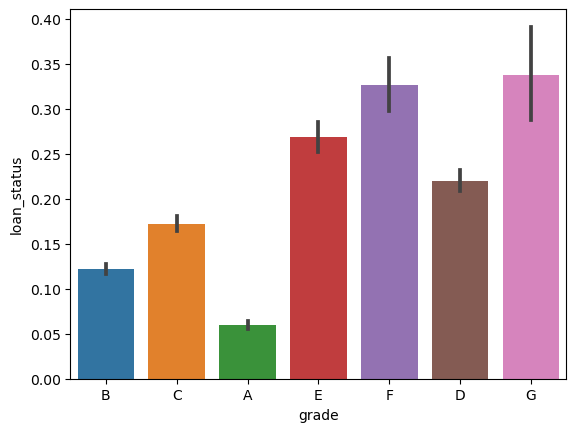

In [16]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

In [17]:
#  define a function to plot loan_status across categorical variables

def plot(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df,orient='v')
    plt.show()

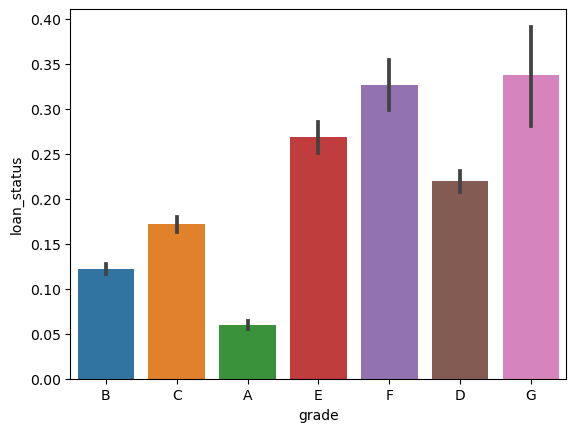

In [18]:
# compare default rates across grade of loan
plot('grade')

Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan. 

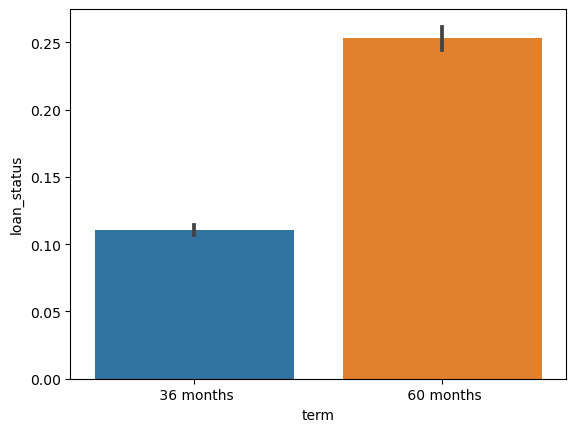

In [19]:
# plot the graph over term
plot('term')

 here we can see that default rate of 60 month loan is more than 36 months loans

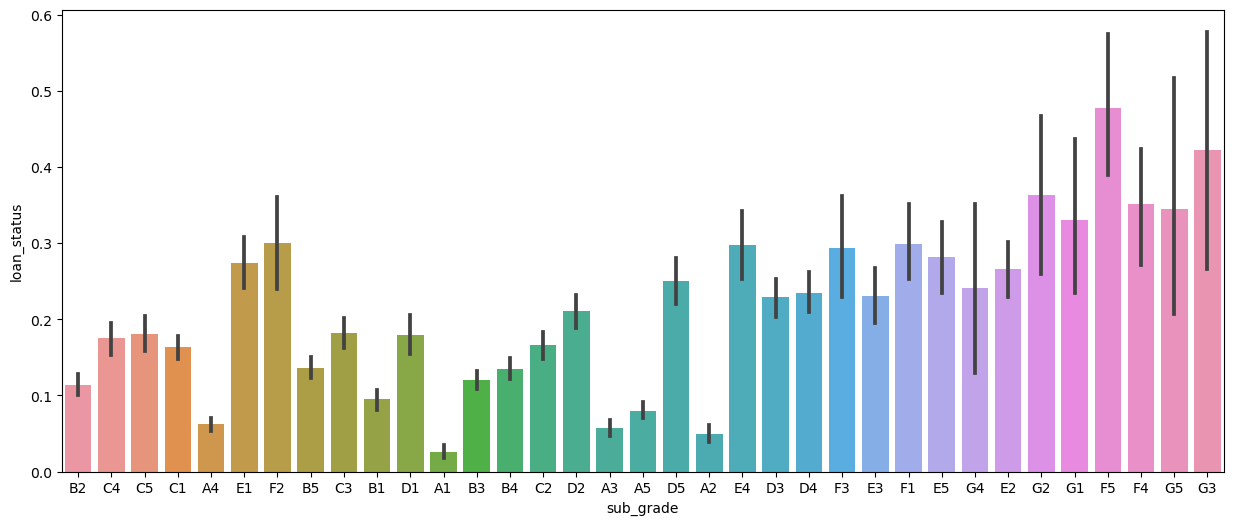

In [20]:
# plot over sub_grade

plt.figure(figsize=(15, 6))
plot('sub_grade')

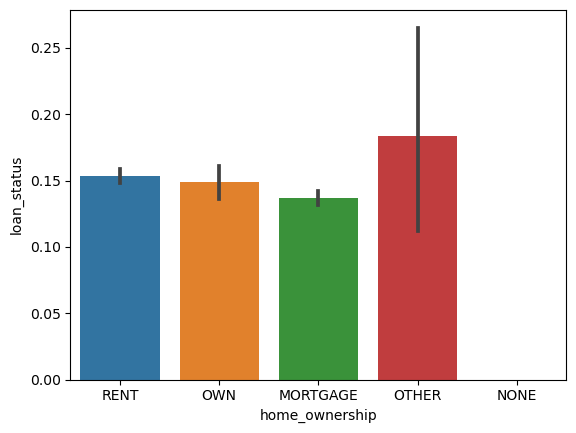

In [21]:
# home ownership
plot('home_ownership')

From above plot for ‘home_ownership’ we can infer that the defaulters rate is constant hence the chances of loan getting deaulted do not depend on home ownership.


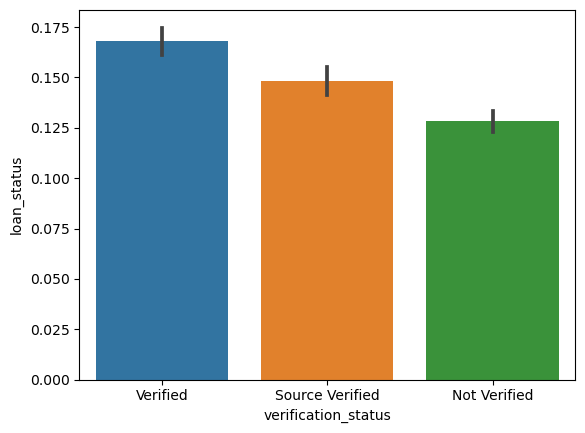

In [22]:
# verification_status
plot('verification_status')

 From above plot for ‘verification_status’ we can infer that the defaulters rate is high for verified loans  more than not verified

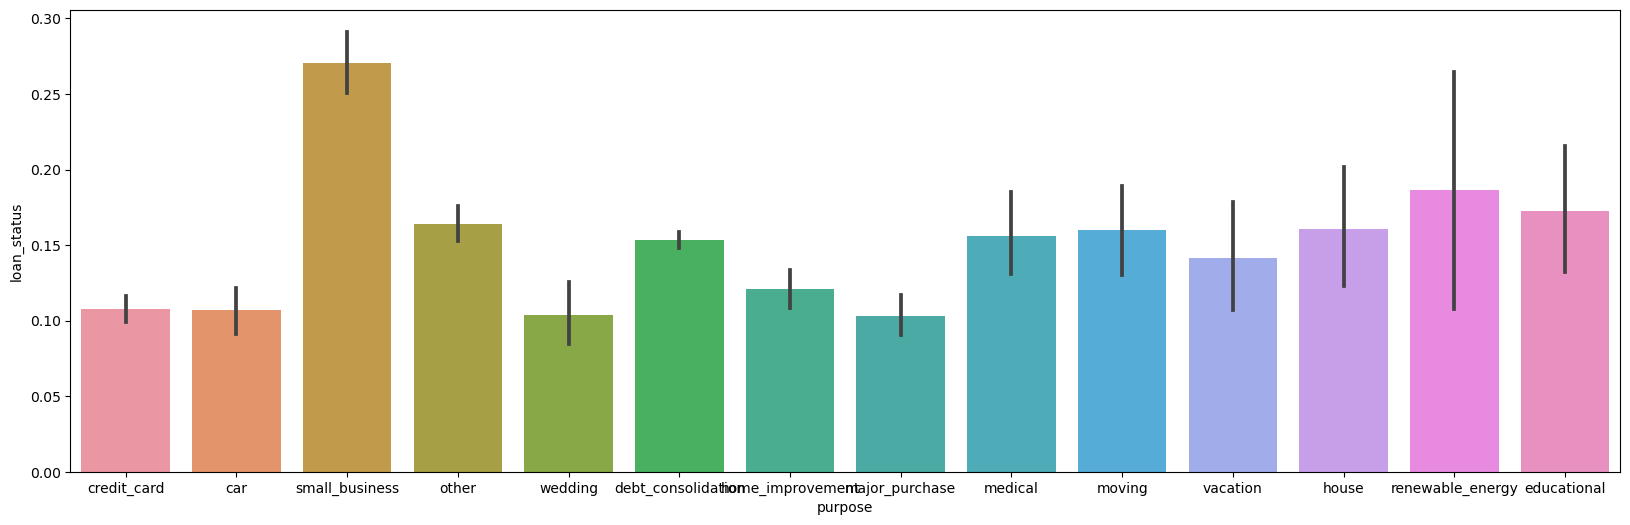

In [23]:
# purpose
plt.figure(figsize=(20, 6))
plot('purpose')

From above plot for ‘purpose’ we can infer that the defaulters rate is higher for small business

In [24]:
# observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [25]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [26]:
# observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

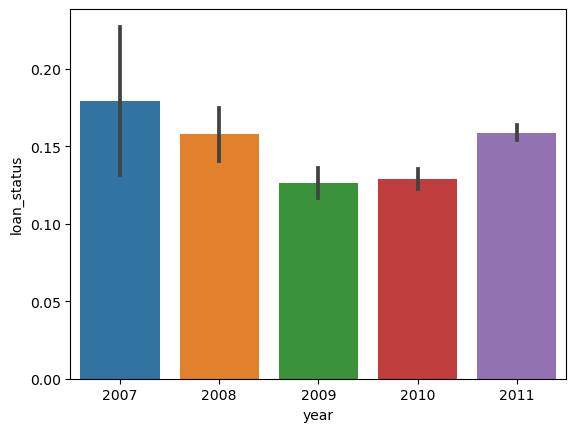

In [27]:
# compare the default rates across years

plot('year')

2007 has high default rate but from 2008-2010 the default rate decreses but there's a sundden increase in default rate in the year 2011

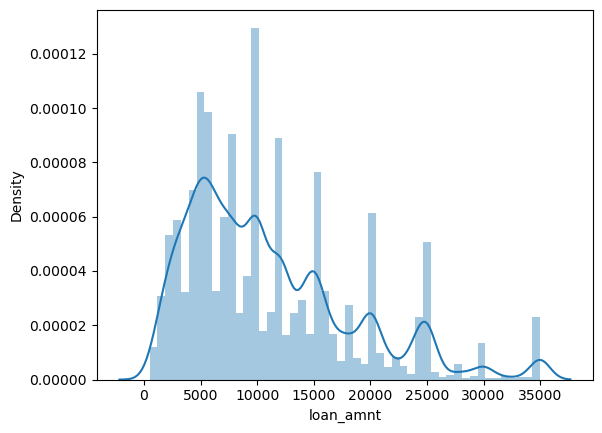

In [28]:
# loan amount
sns.distplot(df['loan_amnt'])
plt.show()

Let's bin the loan amount variable into small, medium, high, very high.

In [29]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [30]:
df['loan_amnt'].value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

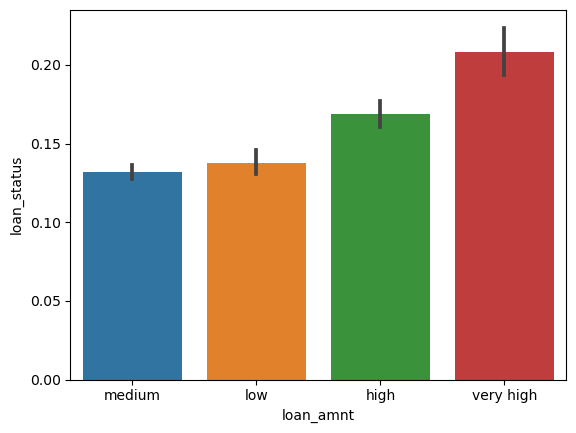

In [31]:
# compare the default rates across loan amount type
plot('loan_amnt')

from above plot higher the loan amount higher the default rate

In [32]:
# convert funded amount invested to bins

df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

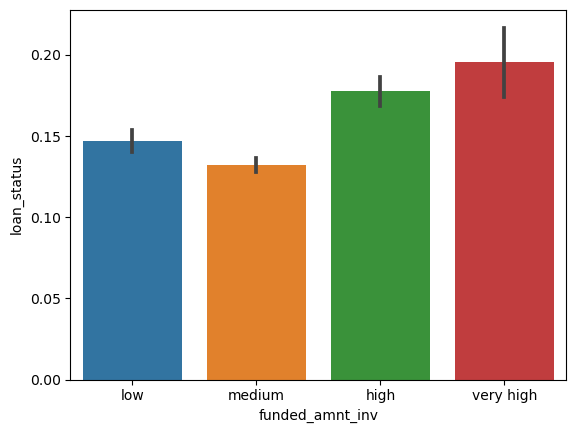

In [33]:
# funded amount invested
plot('funded_amnt_inv')

In [34]:
# convert interest rate to low, medium, high
df['int_rate'] = df['int_rate'].replace('%', '', regex=True).astype(float)

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

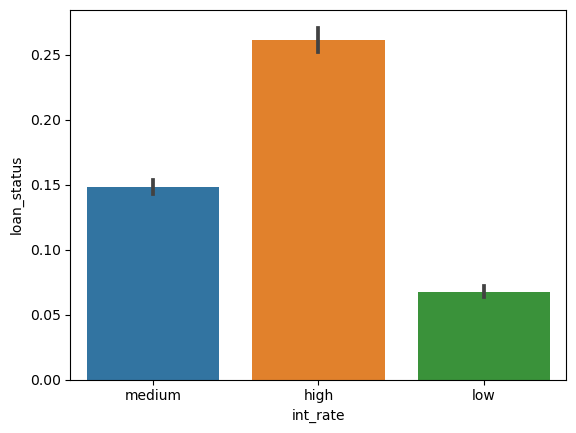

In [35]:
# comparing default rates across rates of interest
plot('int_rate')

From above plot for ‘int_rate’ we can infer that higher the interest rate higher the default rate

In [36]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

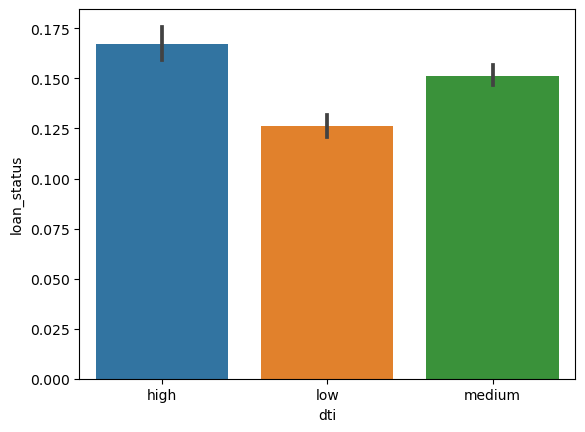

In [37]:
# comparing default rates across debt to income ratio
plot('dti')

From above plot for ‘dti’ we can infer that the default rate is higher for low dti 

In [38]:
# installment dividing into the respective bins into Low, Medium, High and very High
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

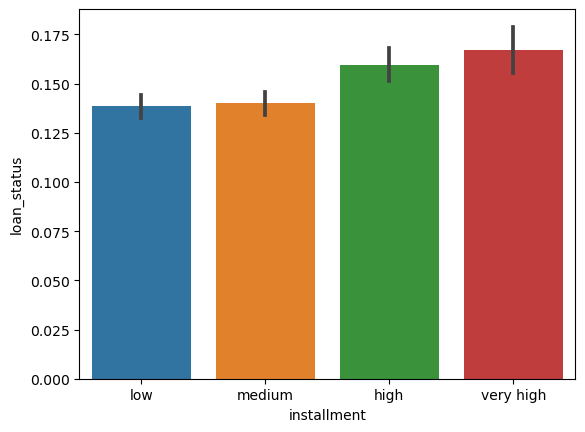

In [39]:
# comparing default rates across installment
plot('installment')

 from above graph we can observe tha higher the installment amount, the higher the default rate

In [40]:
df = df[~df['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))


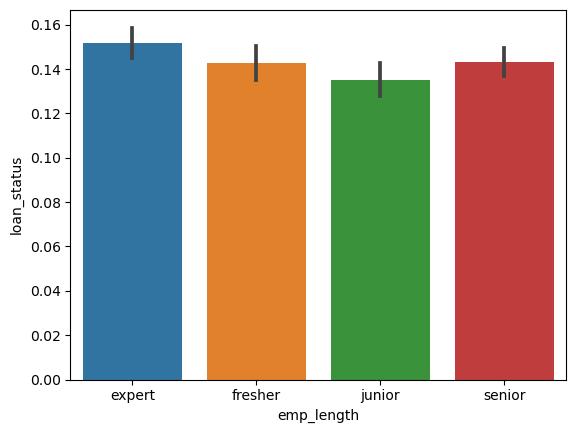

In [41]:
# emp_length and default rate
plot('emp_length')

## MULTIVARIATE ANALYSIS

Multi' means many, and 'variate' means variable. Multivariate analysis refers to the statistical procedure for analyzing the data involving more than two variables.
Alternatively, this can be used to analyze the relationship between dependent and independent variables.
Multivariate analysis has various applications in clustering, feature selection, root-cause analysis, hypothesis testing, dimensionality reduction, etc.


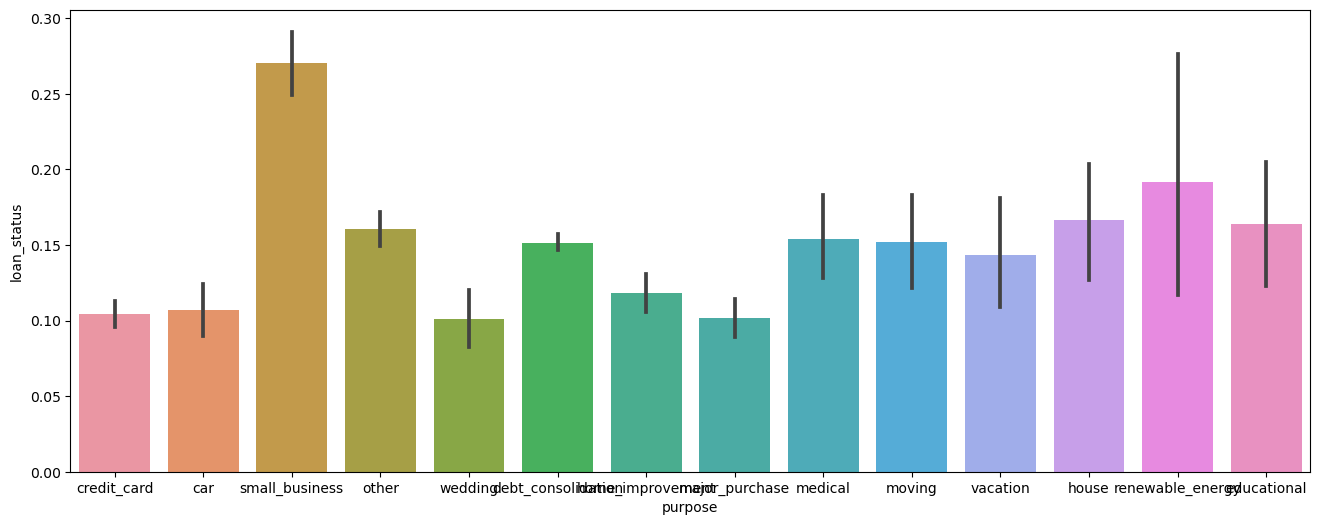

In [42]:
plt.figure(figsize=(16, 6))
plot('purpose')

From above plot for ‘purpose’ we can infer that the default rate is higher for small business

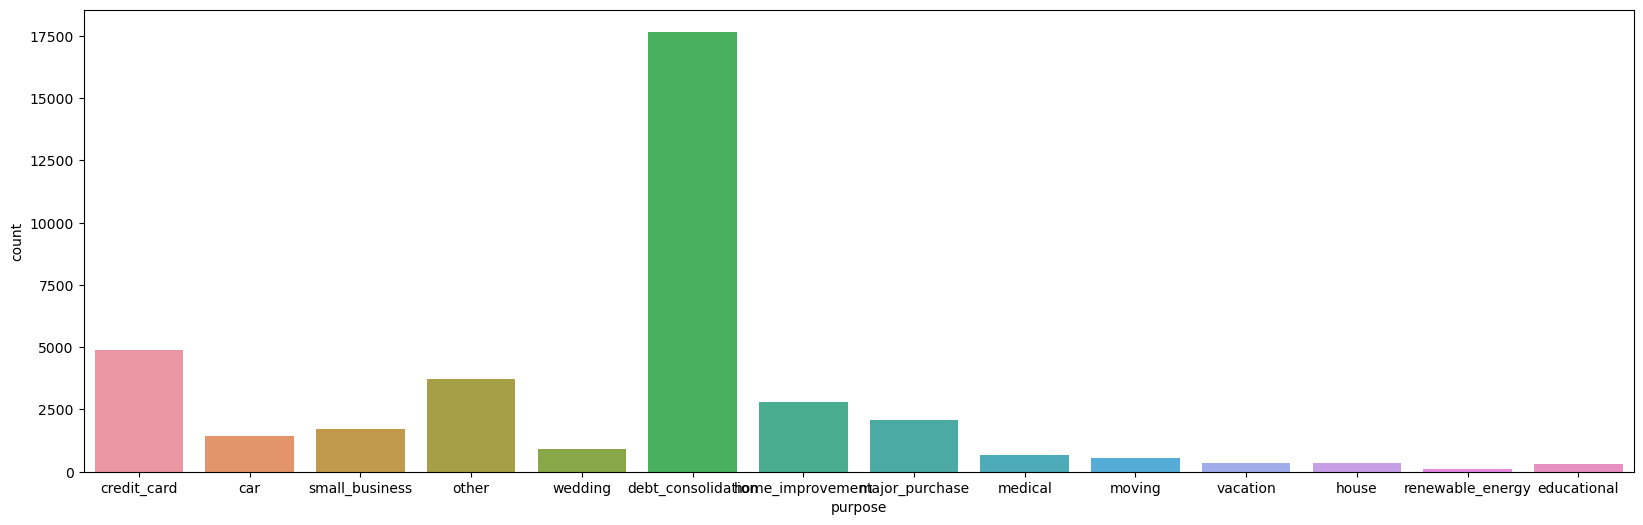

In [43]:
plt.figure(figsize=(20, 6))
sns.countplot(x='purpose', data=df)
plt.show()

most loans are debt consolidation (to repay other debts)

In [44]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

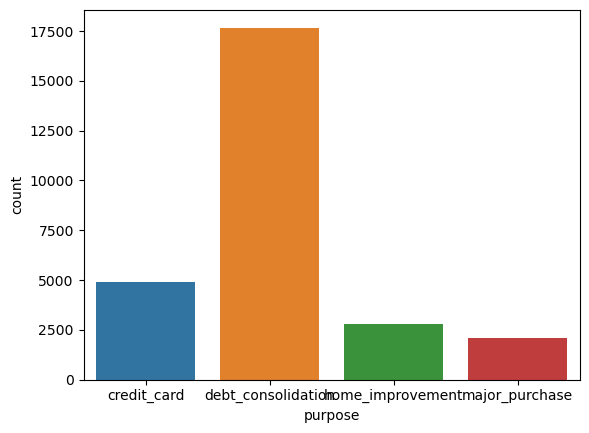

In [45]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.show()

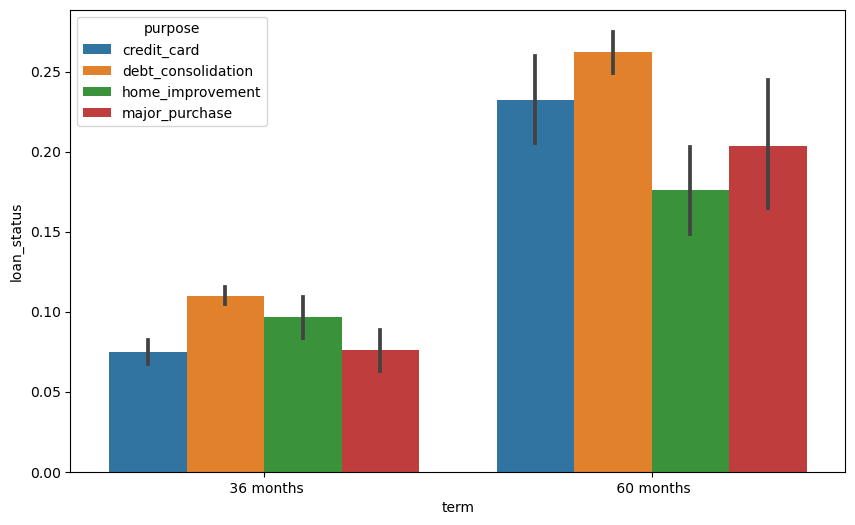

In [46]:
# now compare the default rates across two types of categorical variables

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

The default rate is low in short term where as the default rate is high in long term and the purpose is also high.

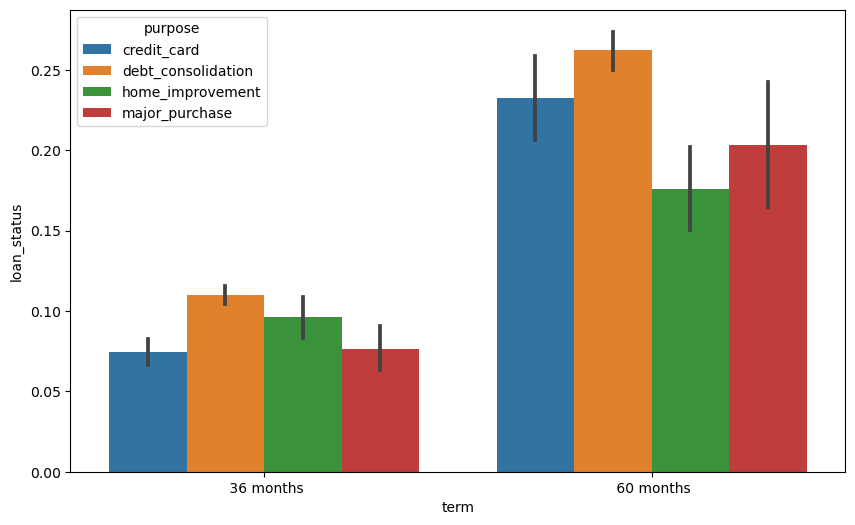

In [47]:
# function which takes a categorical variable and plots the default rate

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

    
plot_segmented('term')

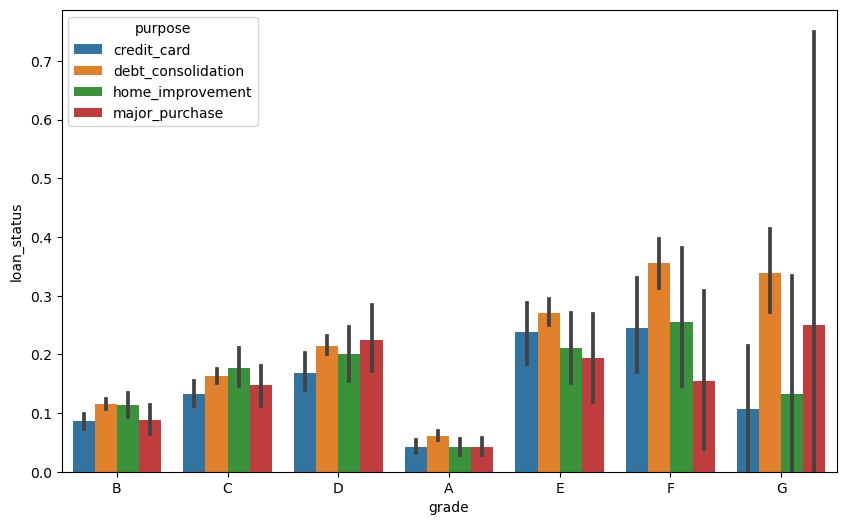

In [48]:
# grade of loan
plot_segmented('grade')

As we can see, default ratio increases for every purpose wrt grade

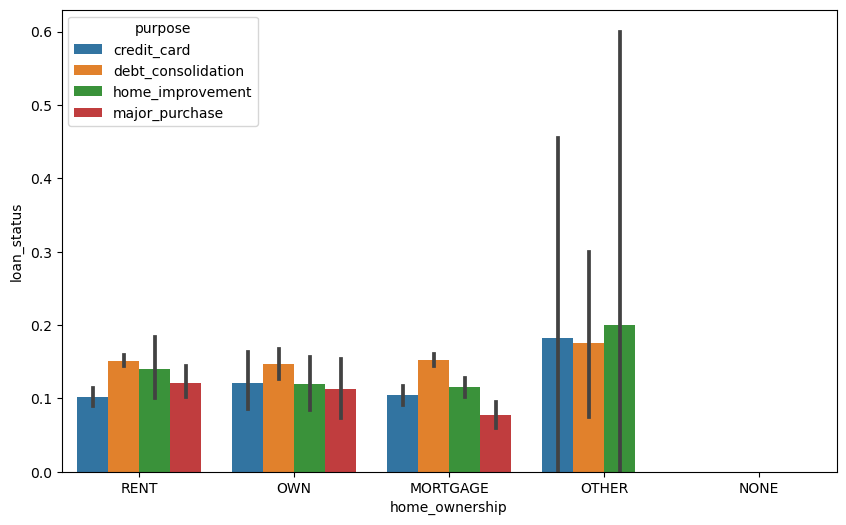

In [49]:
# home ownership 
plot_segmented('home_ownership')

In general, debt consolidation loans have the highest default rates.

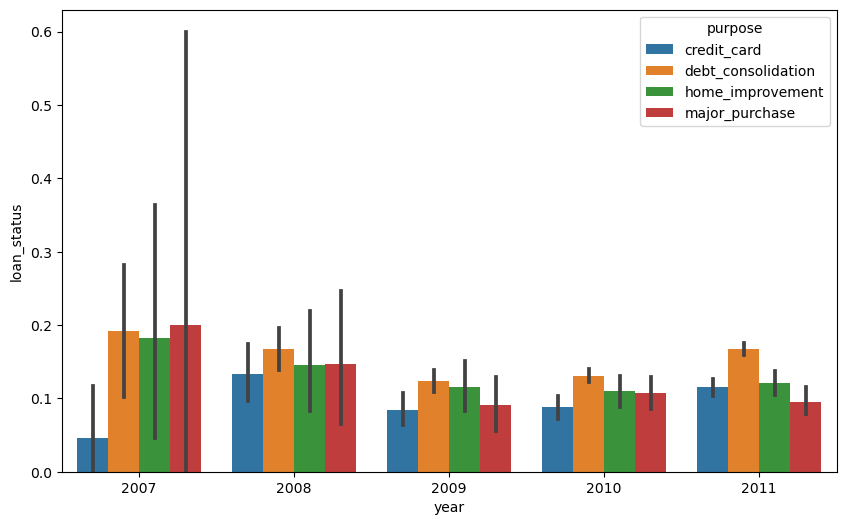

In [50]:
# year
plot_segmented('year')

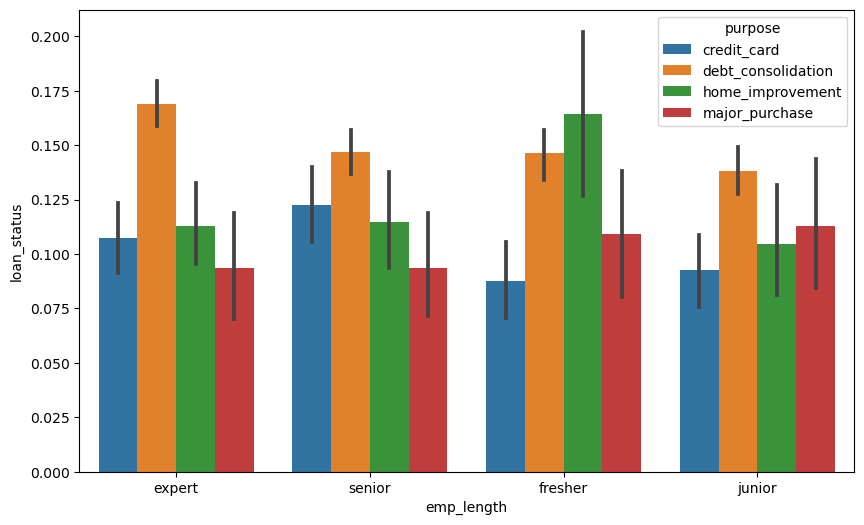

In [51]:
# emp_length
plot_segmented('emp_length')

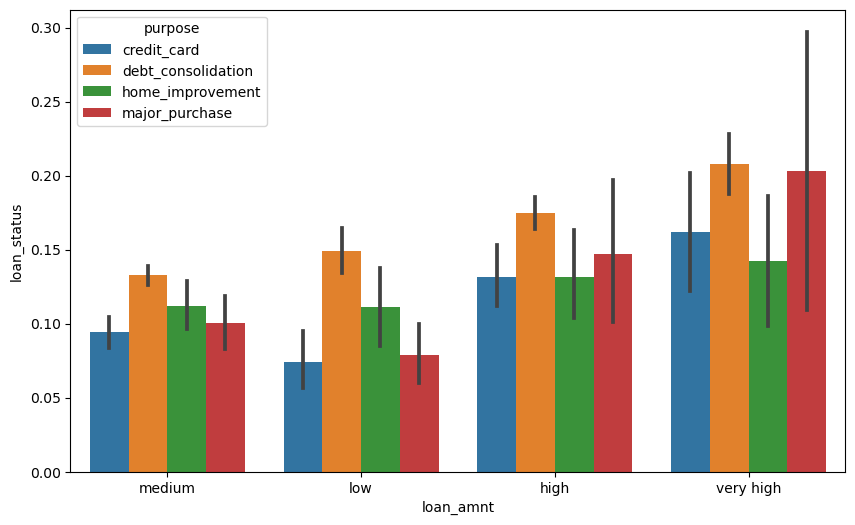

In [52]:
plot_segmented('loan_amnt')

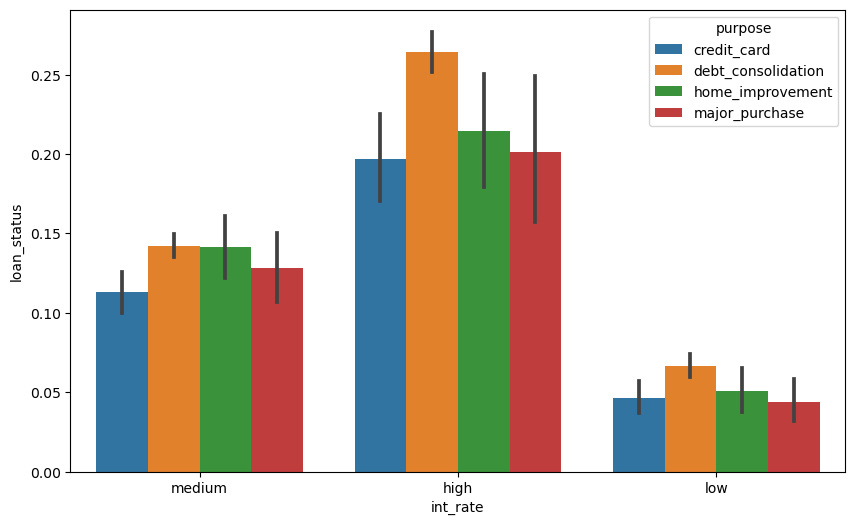

In [53]:
# interest rate
plot_segmented('int_rate')

from above graph we can see when the interest rate increases with every purpose the default rate also increase

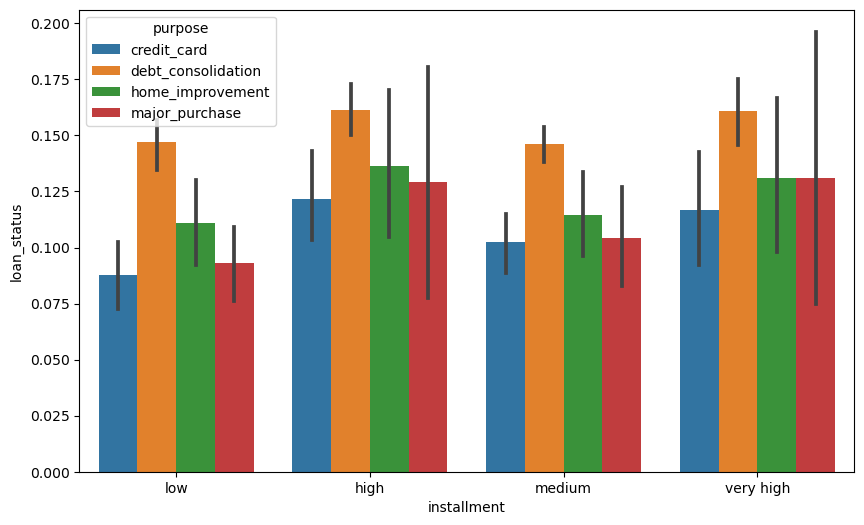

In [54]:
# installment
plot_segmented('installment')

from above graph we can see that low installment wrt infer to low defalut rate 

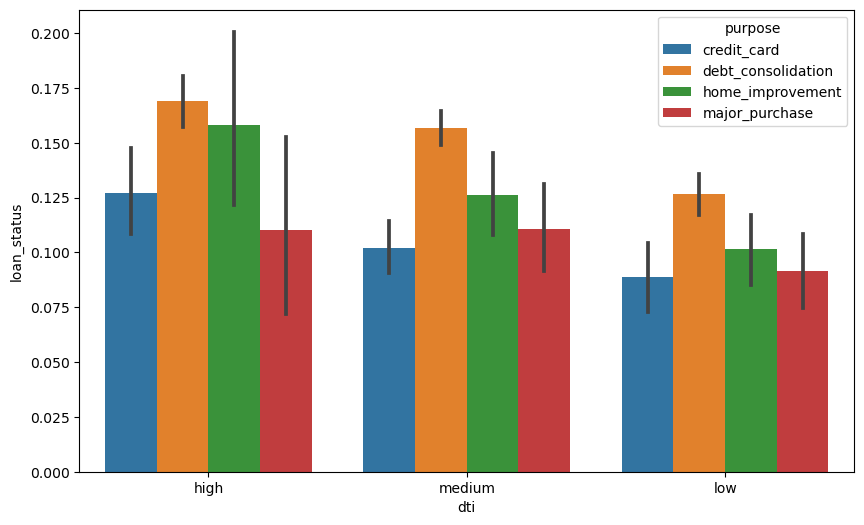

In [55]:
plot_segmented('dti')

from above graph we can see that high dti wrt purpose high default rate

### CONCLUSION


After analysing all the related features available in the dataset, we can come to an end, deducing the main driving features for the Loan default analysis are: term, grade, purpose, revol_util, int_rate, annual_inc, loan amount, annual income

MAJOR FACTOR INFLUENCING CHARGE OFFs 1. Interest rate 2. Loan amount 3. Annual income 4. Public record of bankruptcies 5. Verification status is unverified 6. Home ownership status of others, rent and mortgage 7. Grade: lower grade tend to have higher default 8. Term 9.Purpose 